In [125]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='-1'    

import pandas as pd
import numpy as np
import sklearn.preprocessing as p
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
import keras.layers as l
from keras.models import Sequential

In [629]:
data = pd.read_csv('input/data_before_direct.csv', parse_dates=['start_time']).sort_values('start_time').fillna(0)

data.shape

(14337, 55)

In [630]:
data.start_time.min(), data.start_time.max() 

(Timestamp('2015-07-25 17:51:36.806330'),
 Timestamp('2015-07-26 14:40:52.280043'))

In [648]:
import datetime
corte = datetime.datetime.strptime('2015-07-26 13:35', '%Y-%m-%d %H:%M')

In [649]:
train_data = data[data.start_time < corte]
test_data = data[data.start_time > corte]
print(train_data.shape)
print(test_data.shape)

(11073, 55)
(3264, 55)


In [650]:
labels = [c for c in data.columns if 'mode' in c]
num_cols = [c for c in data.columns if c not in labels and c not in ['start_time']]

In [659]:
scaler = p.StandardScaler()
scaler.fit(data[num_cols])

train_x = scaler.transform(train_data[num_cols])
test_x = scaler.transform(test_data[num_cols])

print(train_x.shape)
print(test_x.shape)

(11073, 48)
(3264, 48)


In [854]:
model = Sequential()
model.add(l.Input(input_shape=(train_x.shape[1],)))
model.add(l.Dense(40, name='hidden_in', activation='relu'))
# model.add(l.Dropout(0.1))
# model.add(l.Dense(80, activation='relu'))
# model.add(l.Dropout(0.1))
model.add(l.Dense(30, name='bottleneck', activation='linear'))
model.add(l.Dense(40, name='hidden_out', activation='relu'))
# model.add(l.Dense(100, activation='relu'))
model.add(l.Dense(train_x.shape[1], name='output', activation='linear'))
model.compile(optimizer='sgd', loss='mse')

model.summary()

TypeError: The added layer must be an instance of class Layer. Found: Tensor("input_1:0", shape=(?, 48), dtype=float32)

In [805]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['axes.facecolor']='white'
plt.rcParams['figure.facecolor']='white'
def plotit(history, min_epoch=0, show_all=True):
    legends = []
    if show_all:
        for val in history.history:
            plt.plot(history.history[val][min_epoch:])
            legends.append(val)
    else:
        plt.plot(history.history['loss'][min_epoch:])
        plt.plot(history.history['val_loss'][min_epoch:])
        legends = ['loss']
    plt.title('MSE del modelo')
    plt.ylabel('MSE')
    plt.xlabel('epoch')
    plt.legend(legends, loc='upper left')
    plt.show()

In [806]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

reduce =  ReduceLROnPlateau(patience=5, factor=0.2, verbose=1)

history = model.fit(train_x, train_x, 
                    batch_size=512, epochs=600, 
                    validation_data=(test_x,test_x), 
                    callbacks=[reduce])

Train on 11073 samples, validate on 3264 samples
Epoch 1/600
11073/11073 [==============================] - 2s 184us/step - loss: 1.1405 - val_loss: 0.5346
Epoch 2/600
11073/11073 [==============================] - 0s 11us/step - loss: 1.0608 - val_loss: 0.5305
Epoch 3/600
11073/11073 [==============================] - 0s 10us/step - loss: 1.0131 - val_loss: 0.5275
Epoch 4/600
11073/11073 [==============================] - 0s 10us/step - loss: 0.9787 - val_loss: 0.5250
Epoch 5/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.9512 - val_loss: 0.5227
Epoch 6/600
11073/11073 [==============================] - 0s 10us/step - loss: 0.9272 - val_loss: 0.5205
Epoch 7/600
11073/11073 [==============================] - 0s 10us/step - loss: 0.9058 - val_loss: 0.5184
Epoch 8/600
11073/11073 [==============================] - 0s 10us/step - loss: 0.8861 - val_loss: 0.5163
Epoch 9/600
11073/11073 [==============================] - 0s 10us/step - loss: 0.8673 - val_loss: 0.51

11073/11073 [==============================] - 0s 10us/step - loss: 0.3256 - val_loss: 0.4048
Epoch 78/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.3233 - val_loss: 0.4040
Epoch 79/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.3210 - val_loss: 0.4032
Epoch 80/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.3186 - val_loss: 0.4024
Epoch 81/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.3164 - val_loss: 0.4016
Epoch 82/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.3141 - val_loss: 0.4007
Epoch 83/600
11073/11073 [==============================] - 0s 10us/step - loss: 0.3118 - val_loss: 0.3999
Epoch 84/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.3096 - val_loss: 0.3991
Epoch 85/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.3074 - val_loss: 0.3983
Epoch 86/600
11073/11073 [==============================]

11073/11073 [==============================] - 0s 10us/step - loss: 0.1947 - val_loss: 0.3494
Epoch 154/600
11073/11073 [==============================] - 0s 10us/step - loss: 0.1935 - val_loss: 0.3488
Epoch 155/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.1923 - val_loss: 0.3482
Epoch 156/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.1912 - val_loss: 0.3477
Epoch 157/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.1901 - val_loss: 0.3471
Epoch 158/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.1889 - val_loss: 0.3464
Epoch 159/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.1878 - val_loss: 0.3458
Epoch 160/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.1868 - val_loss: 0.3452
Epoch 161/600
11073/11073 [==============================] - 0s 10us/step - loss: 0.1857 - val_loss: 0.3446
Epoch 162/600
11073/11073 [=====================

11073/11073 [==============================] - 0s 9us/step - loss: 0.1359 - val_loss: 0.3132
Epoch 230/600
11073/11073 [==============================] - 0s 10us/step - loss: 0.1354 - val_loss: 0.3127
Epoch 231/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.1349 - val_loss: 0.3123
Epoch 232/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.1344 - val_loss: 0.3119
Epoch 233/600
11073/11073 [==============================] - 0s 10us/step - loss: 0.1339 - val_loss: 0.3114
Epoch 234/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.1334 - val_loss: 0.3110
Epoch 235/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.1330 - val_loss: 0.3106
Epoch 236/600
11073/11073 [==============================] - 0s 10us/step - loss: 0.1325 - val_loss: 0.3102
Epoch 237/600
11073/11073 [==============================] - 0s 10us/step - loss: 0.1320 - val_loss: 0.3098
Epoch 238/600
11073/11073 [====================

11073/11073 [==============================] - 0s 10us/step - loss: 0.1068 - val_loss: 0.2887
Epoch 306/600
11073/11073 [==============================] - 0s 10us/step - loss: 0.1065 - val_loss: 0.2885
Epoch 307/600
11073/11073 [==============================] - 0s 10us/step - loss: 0.1063 - val_loss: 0.2882
Epoch 308/600
11073/11073 [==============================] - 0s 10us/step - loss: 0.1060 - val_loss: 0.2879
Epoch 309/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.1057 - val_loss: 0.2876
Epoch 310/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.1054 - val_loss: 0.2874
Epoch 311/600
11073/11073 [==============================] - 0s 10us/step - loss: 0.1051 - val_loss: 0.2871
Epoch 312/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.1048 - val_loss: 0.2868
Epoch 313/600
11073/11073 [==============================] - 0s 10us/step - loss: 0.1045 - val_loss: 0.2866
Epoch 314/600
11073/11073 [==================

11073/11073 [==============================] - 0s 10us/step - loss: 0.0877 - val_loss: 0.2703
Epoch 382/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.0875 - val_loss: 0.2700
Epoch 383/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.0873 - val_loss: 0.2698
Epoch 384/600
11073/11073 [==============================] - 0s 10us/step - loss: 0.0871 - val_loss: 0.2696
Epoch 385/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.0869 - val_loss: 0.2694
Epoch 386/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.0867 - val_loss: 0.2692
Epoch 387/600
11073/11073 [==============================] - 0s 10us/step - loss: 0.0865 - val_loss: 0.2690
Epoch 388/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.0863 - val_loss: 0.2688
Epoch 389/600
11073/11073 [==============================] - 0s 10us/step - loss: 0.0861 - val_loss: 0.2686
Epoch 390/600
11073/11073 [====================

11073/11073 [==============================] - 0s 10us/step - loss: 0.0742 - val_loss: 0.2564
Epoch 458/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.0741 - val_loss: 0.2563
Epoch 459/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.0740 - val_loss: 0.2561
Epoch 460/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.0738 - val_loss: 0.2560
Epoch 461/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.0737 - val_loss: 0.2558
Epoch 462/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.0735 - val_loss: 0.2557
Epoch 463/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.0734 - val_loss: 0.2555
Epoch 464/600
11073/11073 [==============================] - 0s 10us/step - loss: 0.0732 - val_loss: 0.2554
Epoch 465/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.0731 - val_loss: 0.2552
Epoch 466/600
11073/11073 [======================

11073/11073 [==============================] - 0s 10us/step - loss: 0.0647 - val_loss: 0.2465
Epoch 534/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.0646 - val_loss: 0.2464
Epoch 535/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.0645 - val_loss: 0.2463
Epoch 536/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.0644 - val_loss: 0.2462
Epoch 537/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.0642 - val_loss: 0.2461
Epoch 538/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.0641 - val_loss: 0.2460
Epoch 539/600
11073/11073 [==============================] - 0s 10us/step - loss: 0.0640 - val_loss: 0.2459
Epoch 540/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.0639 - val_loss: 0.2457
Epoch 541/600
11073/11073 [==============================] - 0s 9us/step - loss: 0.0638 - val_loss: 0.2456
Epoch 542/600
11073/11073 [======================

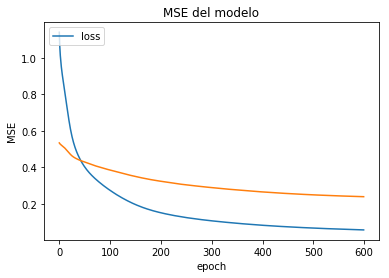

In [807]:
plotit(history, show_all=False)

In [639]:
infected = pd.read_csv('input/data_infected_direct.csv', parse_dates=['start_time']).sort_values('start_time').drop('start_time', axis=1)
infected.fillna(0, inplace=True)
infected_x = scaler.transform(infected[num_cols])

In [640]:
after = pd.read_csv('input/data_after_direct.csv', parse_dates=['start_time']).sort_values('start_time').drop('start_time', axis=1)
after.fillna(0, inplace=True)
after_x = scaler.transform(after[num_cols])

In [792]:
train_pred = model.predict(train_x)

In [793]:
test_pred = model.predict(test_x)

In [794]:
i_pred = model.predict(infected_x)

In [795]:
a_pred = model.predict(after_x)

In [796]:
train_error = ((train_x - train_pred) ** 2).mean(axis=-1) 
print(train_error.mean())
test_error = ((test_x - test_pred) ** 2).mean(axis=-1) 
print(test_error.mean())
infected_error = ((infected_x - i_pred) ** 2).mean(axis=-1)
print(infected_error.mean())
after_error = ((after_x - a_pred) ** 2).mean(axis=-1)
print(after_error.mean())


0.05079323293079824
0.2242760406172531
0.3398167032728574
0.12555553645103648


In [797]:
errors = np.concatenate([train_error, test_error, infected_error, after_error])
print(errors.shape)

(52373,)


In [798]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

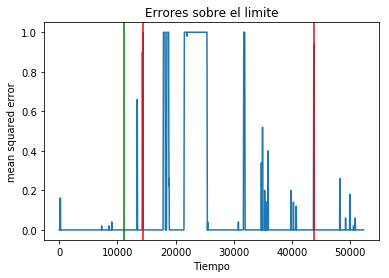

In [831]:
train_line = len(train_x)
infected_line = len(train_x) + len(test_x)
after_line = len(train_x) + len(test_x) + len(infected_x)
plt.plot(running_mean((errors>0.42).astype(int), 50)) 
# plt.plot(running_mean(errors, 200)) 
plt.title('Errores sobre el limite')
plt.axvline(x=train_line, color='green')
plt.axvline(x=infected_line, color='red')
plt.axvline(x=after_line, color='red')
plt.ylabel('mean squared error')
plt.xlabel('Tiempo')
# plt.legend(['Threshold','Error', ])
plt.show()

In [832]:
((train_error > 0.42).astype(int).mean(),
(test_error > 0.42).astype(int).mean(),
(infected_error > 0.42).astype(int).mean(),
(after_error > 0.42).astype(int).mean())

(0.0018061952497064934,
 0.023284313725490197,
 0.17444826061822016,
 0.008807509560783406)

In [837]:
(np.median(train_error),
np.median(test_error),
np.median(infected_error),
np.median(after_error))

(0.03740600474831735,
 0.21569173644547074,
 0.1394629741187928,
 0.09294705504885593)

In [836]:
(np.median(train_error),
np.median(test_error),
np.median(infected_error),
np.median(after_error))

(0.03740600474831735,
 0.21569173644547074,
 0.1394629741187928,
 0.09294705504885593)

In [ ]:
pd.DataFrame

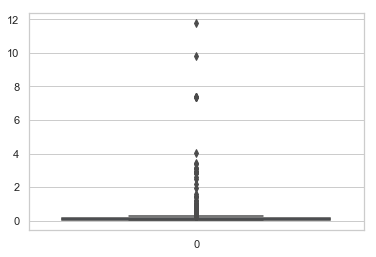

In [851]:
import seaborn as sns
sns.set(style="whitegrid")
all_arr = [test_error, infected_error, after_error]
# ax = sns.boxplot(data=all_arr)
ax = sns.boxplot(data=after_error)